# RIO- 125 Classification Model - Build a Model that Classifies the Side Effects of a Drug

# Life cycle of data analysis projects
1.Data Analysis

2.Feature Engineering

3.Feature Selection

4.Model Building

5.Model Deployment

In [1]:
import pandas as pd # python library to manipulate data. pandas is acronym of panneled data
import numpy as np # numerical python . python library for arithmetical operations

#python library for data visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#to suppress warnings

import warnings
warnings.filterwarnings("ignore")
from faker import Faker

In [2]:
data=pd.read_csv(r"C:\Users\susha\Downloads\webmd.csv")

In [3]:
## To display all columns of the Data Frame

pd.pandas.set_option('display.max_columns',None)

In [4]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [5]:
# To display column names

data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

Feature Description

Description of the dataset
Name : Name of the patient

Race : Race of the patient

Age : Age of the patient

Condition : Condition/symptom from which the patient is suffering

Date : Date of usage

Drug : Name of the drug

DrugId : Identity/code of drug

EaseofUse : Patient's 10-Star rating on the ease of use of drug

Effectiveness : Patient's 10-Star rating on the effectiveness of drug

Reviews : Patient's review

Satisfaction : Patient's 10-Star rating on satisfaction

Sex : Gender of the patient

Sides : Side effects of the drug

UsefulCount : Number of users who found the review useful

In [6]:
# Number of obs#ervations per feature ie 5000 rows per 20 colums

data.shape

(362806, 12)

In [7]:
#statistical summary of the data

data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [8]:
# adding fake names and race to the data set

In [9]:
fake = Faker()

In [12]:
race = ['Black','White','Asian','Hispanic']

In [14]:
data['Name'] = [fake.name() for _ in range(len(data))]
data['Race'] = [fake.random_element(race) for _ in range(len(data))]

In [15]:
# Rename the column sides
data = data.rename(columns={'Sides':'SideEffects'})

In [16]:
# Set the columns 'Name' and 'Race' as the first and second level
data = data.set_index(['Name', 'Race'])

# Reset the index to move 'Name' and 'Race' back to columns
data = data.reset_index()

In [17]:
data.head(2)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,SideEffects,UsefulCount
0,Angela Rivera,Black,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Laura Schaefer,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1


#**1.Exploratory Data Analysis**

In Data Analysis We Try to analyse the following:

1.Missing Values

2.All the Numerical Variables

3.Distribution of Numerical Variables

4.Categorical Variables

5.Cardinality of Categorical Variables

7.Relationship between independent and dependent feature

In [18]:
data.dtypes

Name             object
Race             object
Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
SideEffects      object
UsefulCount       int64
dtype: object

**1.Missing Values**

In [19]:
# Sum of missing values in each columns


data.isnull().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
SideEffects       0
UsefulCount       0
dtype: int64

In [20]:
for i in data:
    data[i]=np.where(data[i]==" ",np.NAN,data[i])
data.isna().sum()

Name                 0
Race                 0
Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41861
Satisfaction         0
Sex              26537
SideEffects      17460
UsefulCount          0
dtype: int64

In [21]:
#Checking the percentage of null values in each feature
#Step 1 - Creating a list of features with null values

features_with_na = [features for features in data.columns if data[features].isnull().sum()>=1]

#Step2 -Print the feature name and percentage of missing values

for feature in features_with_na:
    print(feature,np.round(data[feature].isnull().mean(),3), ' % missing values') # Round to 3 Desimal points

Age 0.034  % missing values
Condition 0.0  % missing values
Reviews 0.115  % missing values
Sex 0.073  % missing values
SideEffects 0.048  % missing values


In [22]:
# Print features with null values stored to a variable

features_with_na

['Age', 'Condition', 'Reviews', 'Sex', 'SideEffects']

In [23]:
data.dropna(axis = 0, inplace = True)
data.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
SideEffects      0
UsefulCount      0
dtype: int64

**BIVARIATE ANALYSIS**

**Bar Plot**

**2.All the Numerical Variables**

In [24]:
# Creating a list of numerical values

numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print("The length of numerical variables: " ,len(numerical_features),'\n')

#display the numerical variables

data[numerical_features].head()

The length of numerical variables:  5 



,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
0,146724.0,5.0,5.0,5.0,0.0
1,146724.0,5.0,5.0,5.0,1.0
6,163180.0,5.0,5.0,2.0,0.0
7,163180.0,5.0,5.0,5.0,0.0
9,9800.0,4.0,2.0,2.0,0.0


**3.Distribution of Numerical Variables**



**3.1. Discrete Variables**

In [25]:
#Numerical Variables are usually of two types - Continuous and discrete

discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25]  # Simply consider values below 25 as discrete

print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [26]:
discrete_feature

['EaseofUse', 'Effectiveness', 'Satisfaction']

In [27]:
data['EaseofUse'].nunique() # number of unique values in discrete column 'EaseofUse '

6

In [28]:
data['EaseofUse'].unique() # Print unique values

array([5., 4., 2., 1., 3., 6.])

In [29]:
data['Effectiveness'].nunique() # number of unique values in discrete column 'EaseofUse '

6

In [30]:
data['Effectiveness'].unique() # Print unique values

array([5., 2., 3., 1., 4., 6.])

In [31]:
data['Satisfaction'].nunique() # number of unique values in discrete column 'EaseofUse '

6

In [32]:
data['Satisfaction'].unique() # Print unique values

array([5., 2., 1., 4., 3., 6.])

**BIVARIATE ANALYSIS**

**Bar Plot**

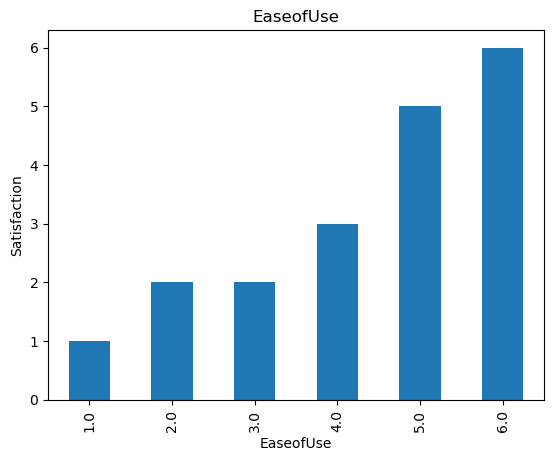

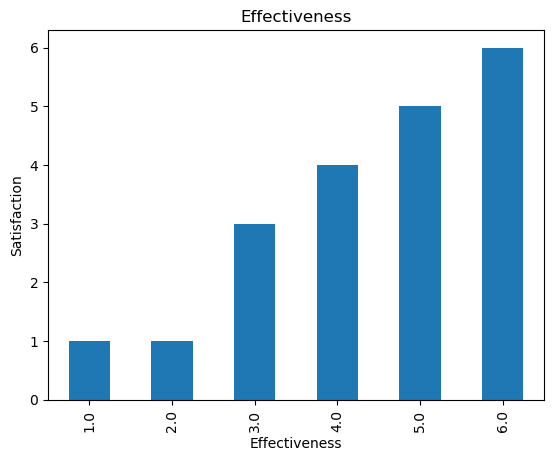

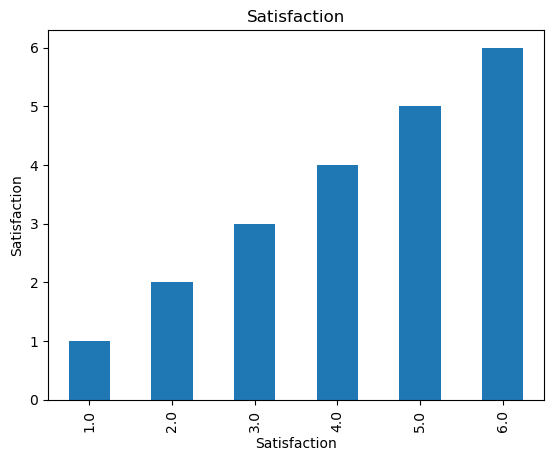

In [33]:
#Finding Relationship with Discrete features and Salary

for feature in discrete_feature:
    df = data.copy()
    df.groupby(feature)['Satisfaction'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Satisfaction')
    plt.title(feature)
    plt.show()

**3.2. Continuous Variables**

In [34]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 2


In [35]:
continuous_feature

['DrugId', 'UsefulCount']

**UNIVARIATE ANALYSIS**

**Histogram**

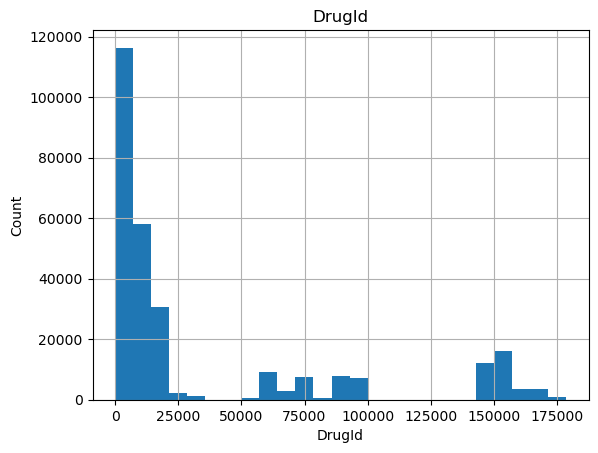

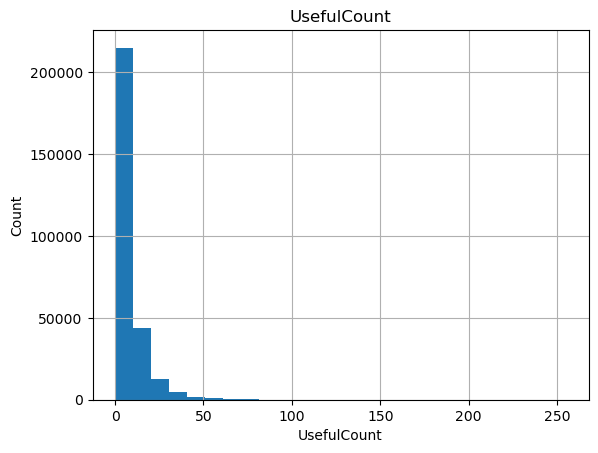

In [36]:
#Analyzing the Distribution of Continuous variables

for feature in continuous_feature:
    df = data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

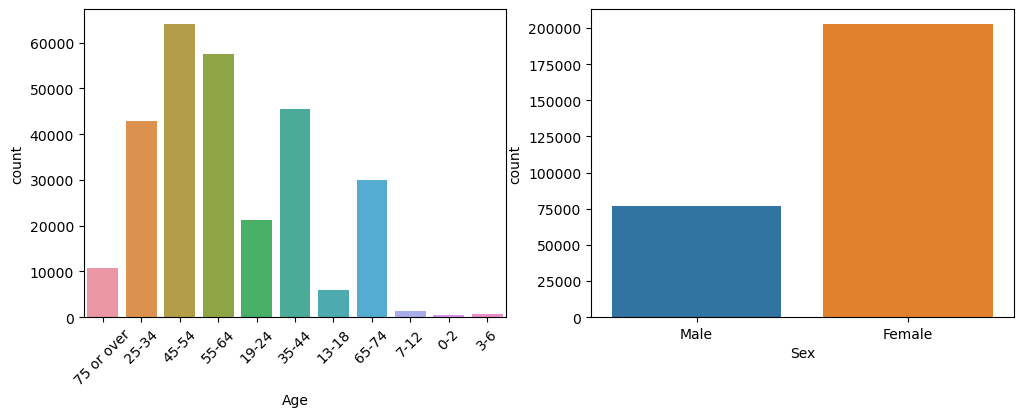

In [37]:
# Bar Charts of some categorical columns

plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.countplot(data=data, x='Age')
plt.xticks(rotation=45)
plt.subplot(122)
sns.countplot(data=data, x='Sex')
plt.show()

**BIVARIATE ANALYSIS**

**Heatmap**

<Axes: >

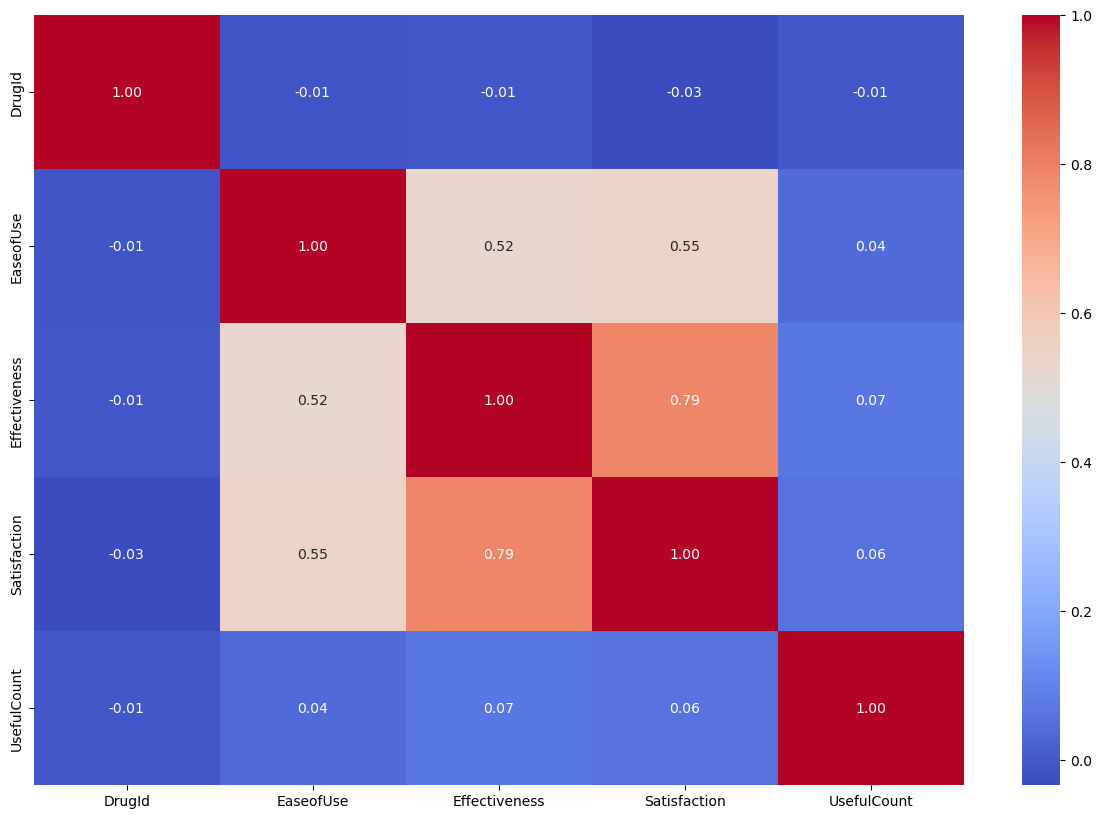

In [38]:
#Heat Map to see the correlation between the numerical features

plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_features].corr(),cmap='coolwarm',fmt='.2f',annot =True)

**4.Outliers**

**Box Plot**

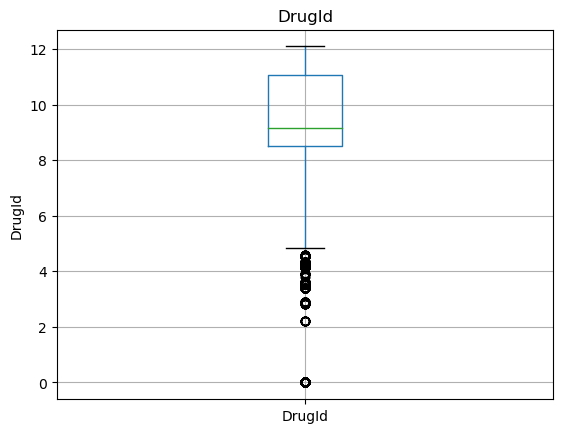

In [39]:
#Boxplot of the Continous Features

for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**5.Categorical Variables**

In [40]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['Name',
 'Race',
 'Age',
 'Condition',
 'Date',
 'Drug',
 'Reviews',
 'Sex',
 'SideEffects']

In [41]:
print("Categorical feature Count {}".format(len(categorical_features)))

Categorical feature Count 9


In [42]:
data[categorical_features].head()

,Name,Race,Age,Condition,Date,Drug,Reviews,Sex,SideEffects
0,Angela Rivera,Black,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,I'm a retired physician and of all the meds I ...,Male,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,Laura Schaefer,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,cleared me right up even with my throat hurtin...,Female,"Drowsiness, dizziness , dry mouth /nose/thro..."
6,Christopher Rodriguez,Asian,25-34,Birth Control,6/15/2017,wymzya fe,Haven't gotten pregnant so it does it's job. I...,Female,"Nausea , vomiting , headache , bloating , ..."
7,Ashley Moreno,Asian,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,I have take this for 5 years age 45-50 to prev...,Female,"Nausea , vomiting , headache , bloating , ..."
9,Joseph Stevenson,Black,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",The 12 hour spray only works for me for 6 hours.,Male,"Temporary burning, stinging, dryness in the no..."


In [43]:
#Checking Cardinality

for feature in categorical_features:
    print("The feature is {} and number of labels are {}".format(feature,len(data[feature].unique())))

The feature is Name and number of labels are 152265
The feature is Race and number of labels are 4
The feature is Age and number of labels are 11
The feature is Condition and number of labels are 1584
The feature is Date and number of labels are 4517
The feature is Drug and number of labels are 5014
The feature is Reviews and number of labels are 216364
The feature is Sex and number of labels are 2
The feature is SideEffects and number of labels are 1594


**UNIVARIATE ANALYSIS**

**Count Plot**

In [46]:
#to plot the count of each category in the categorical variable

plt.subplot(2, 3, 1)
sns.countplot(x ='Age', data = data)
plt.subplot(2, 3, 2)
sns.countplot(x ='Condition', data = data)
plt.subplot(2, 3, 3)
sns.countplot(x ='Drug', data = data)
plt.subplot(2, 3, 4)
sns.countplot(x ='Reviews', data = data)
plt.xticks(rotation=90)
plt.subplot(2, 3, 5)
sns.countplot(x ='Reviews', data = data)
plt.subplot(2, 3, 6)
sns.countplot(x ='SideEffects', data = data)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000023DB8065E10> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023DBEAAC0D0> (for post_execute):


KeyboardInterrupt: 

**BIVARIATE ANALYSIS**

**Count Plot**


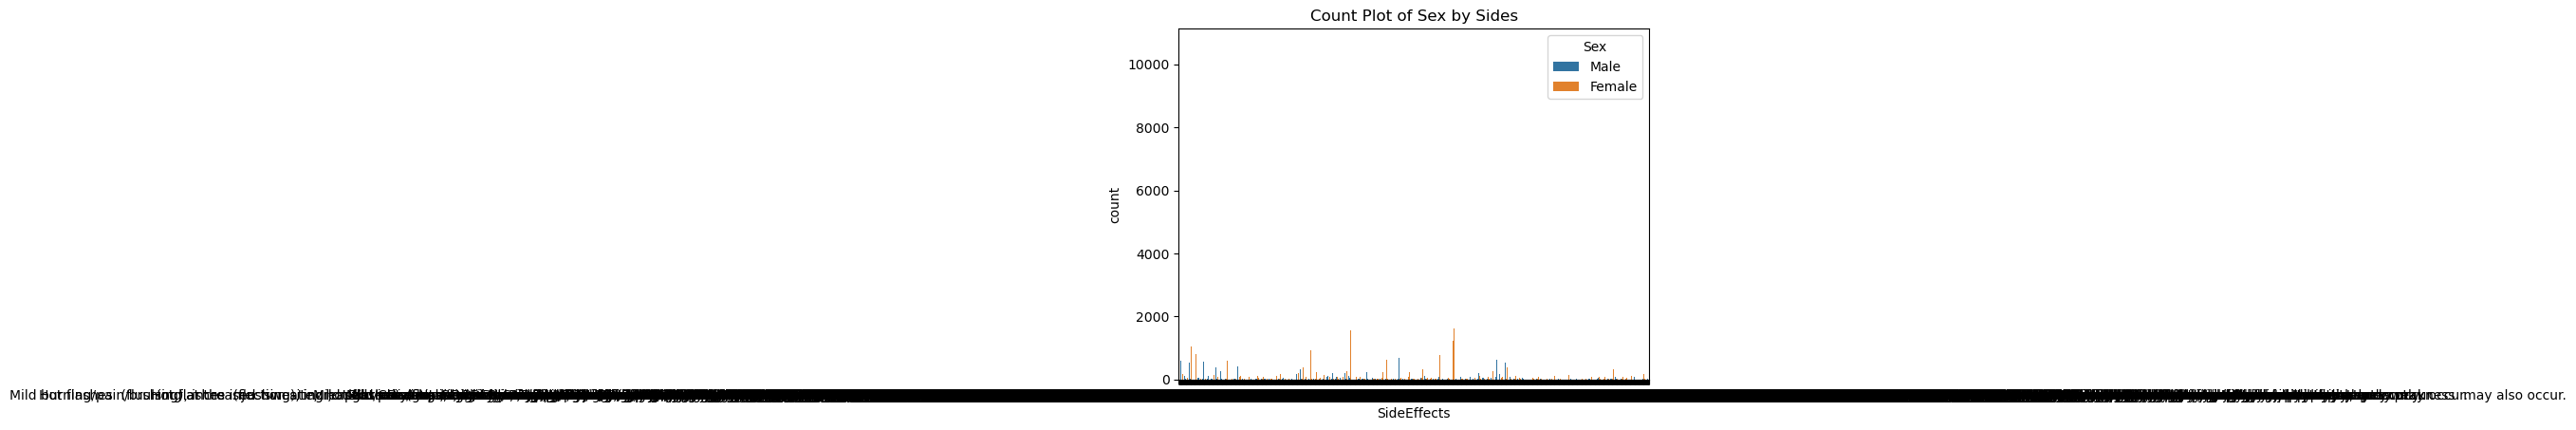

In [50]:
#Bivariate analysis of sides

sns.countplot(x=data['SideEffects'],hue=data['Sex'])
plt.xlabel('SideEffects')  # Label for the x-axis

plt.title('Count Plot of Sex by Sides')  # Title for the plot
plt.show()

Text(0.5, 1.0, 'Users by Race and Gender')

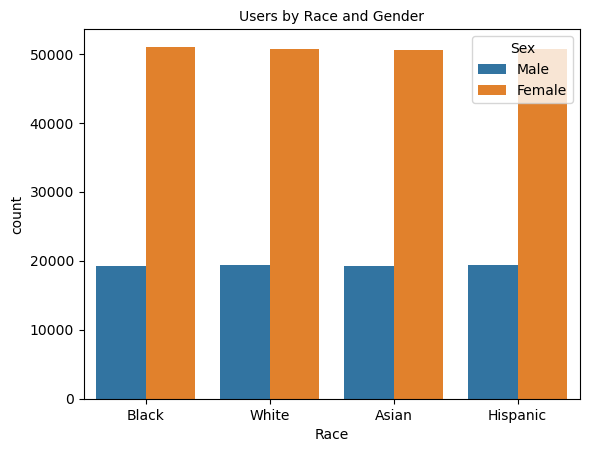

In [47]:
sns.countplot(x='Race',hue='Sex',data=data)
plt.title("Users by Race and Gender", fontsize = 10)

Text(0.5, 1.0, 'Users by Age and Gender')

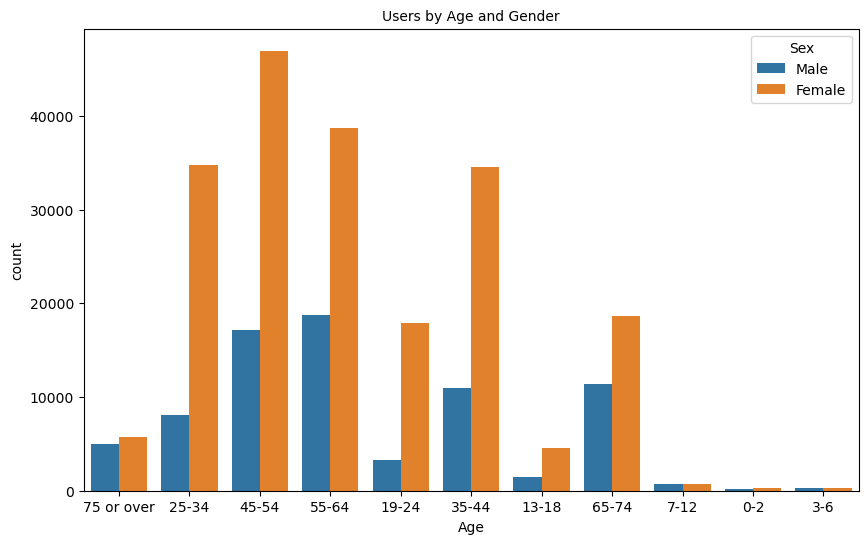

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data)
plt.title("Users by Age and Gender", fontsize = 10)

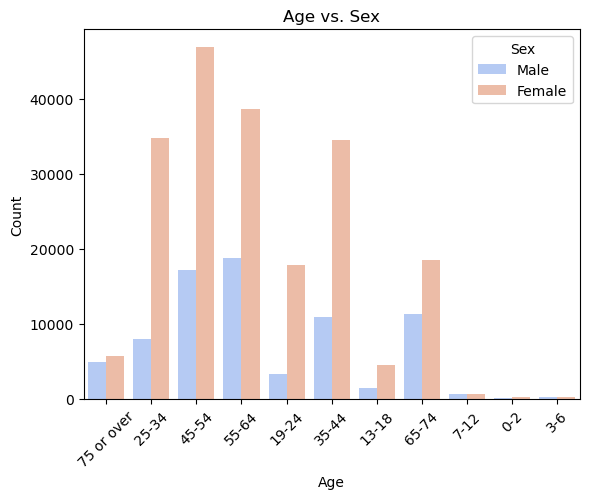

In [52]:
sns.countplot(data=data, x='Age', hue='Sex', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Age vs. Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()


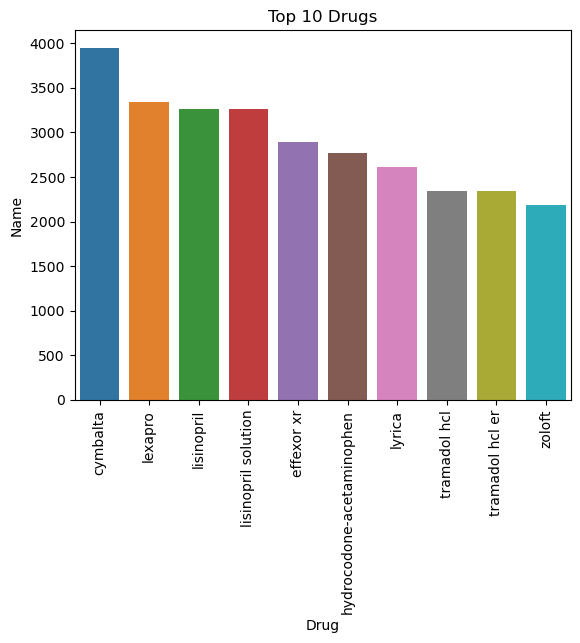

In [53]:
# Top 10 Drugs based on No. of Users

data_= data['Drug'].value_counts().head(10).reset_index()
data_.columns = ['Drug', 'Name']
sns.barplot(data=data_, x = 'Drug', y = 'Name')
plt.title("Top 10 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

Text(0, 0.5, 'Users')

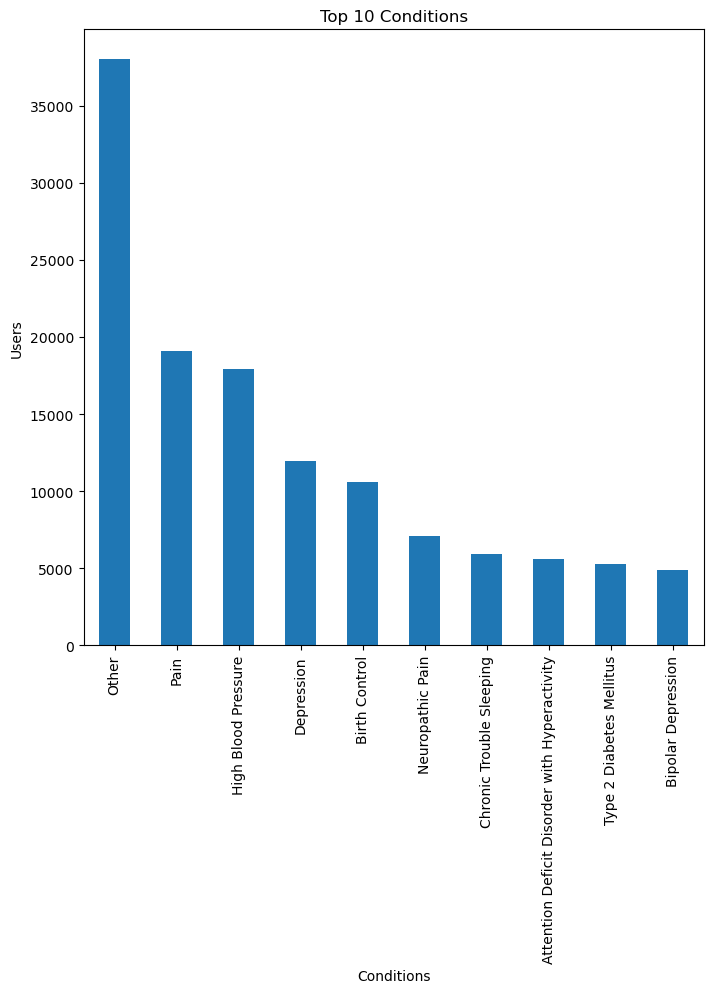

In [55]:
# Top 10 conditions

data['Condition'].value_counts().nlargest(10).plot(kind='bar',figsize=(8,8))
plt.title("Top 10 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

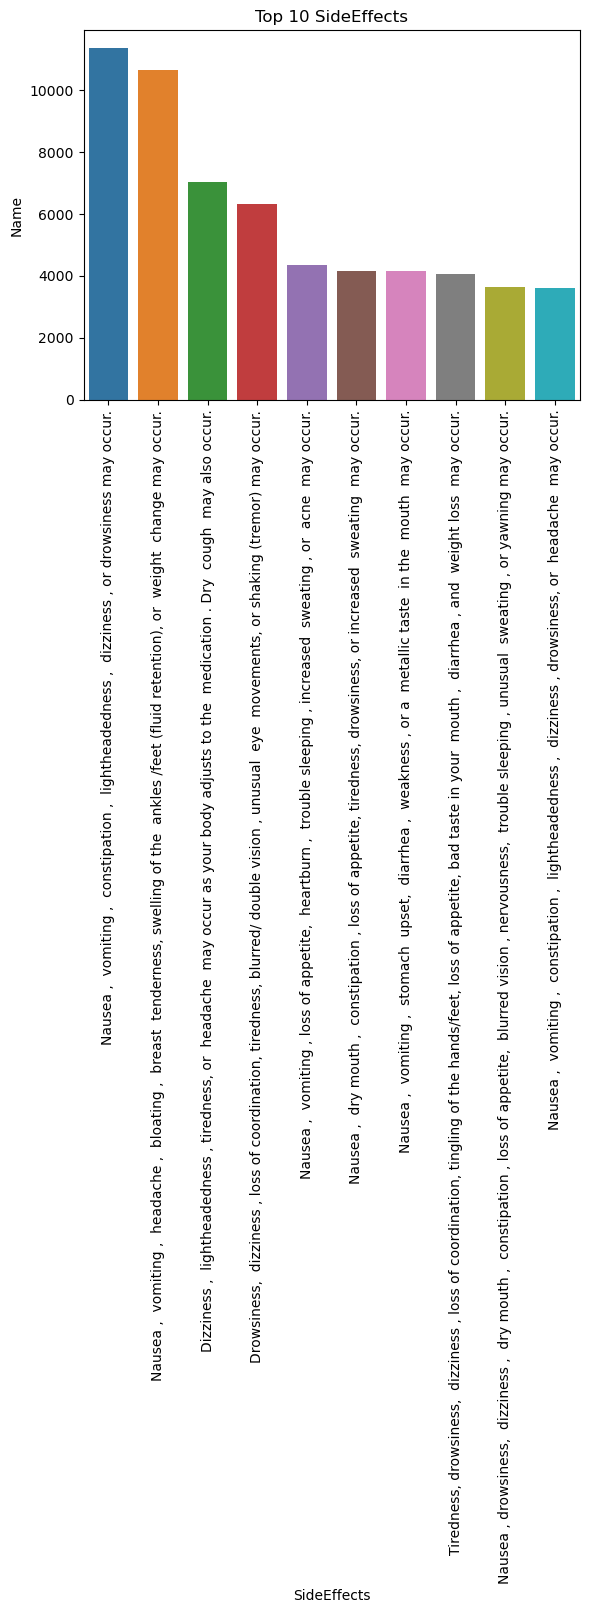

In [56]:
# Top 10 sideeffects based on No. of Users

data_= data['SideEffects'].value_counts().head(10).reset_index()
data_.columns = ['SideEffects', 'Name']
sns.barplot(data=data_, x = 'SideEffects', y = 'Name')
plt.title("Top 10 SideEffects")
plt.xticks(rotation=90,fontsize=10)
plt.show()

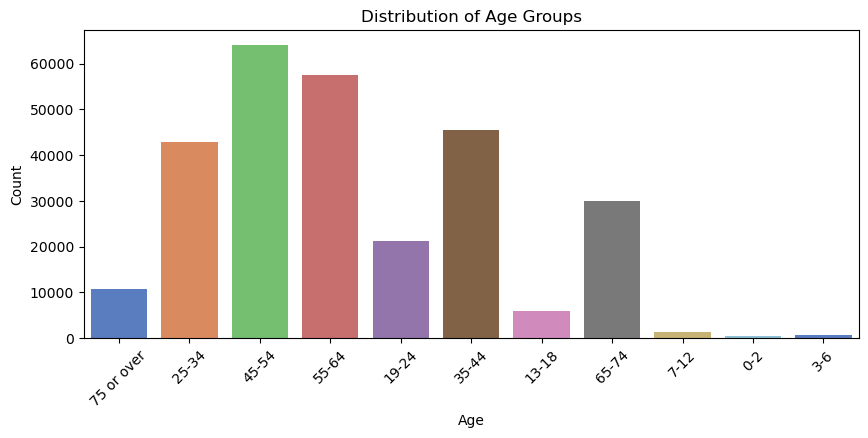

            Counts  Percentages (%)
45-54        64125        22.891403
55-64        57469        20.515338
35-44        45467        16.230852
25-34        42799        15.278427
65-74        29982        10.703003
19-24        21233         7.579776
75 or over   10727         3.829335
13-18         5975         2.132961
7-12          1334         0.476213
3-6            623         0.222399
0-2            393         0.140294


In [57]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Age', palette='muted')
plt.xticks(rotation=45)
plt.title('Distribution of Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Summary statistics
age_counts = data['Age'].value_counts()
age_percentages = (age_counts / age_counts.sum()) * 100
age_summary = pd.DataFrame({'Counts': age_counts, 'Percentages (%)': age_percentages})
print(age_summary)

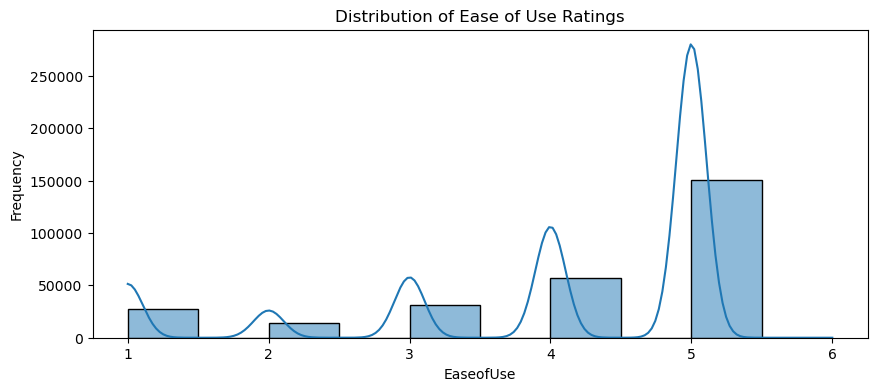

Mean EaseofUse: 4.03
Median EaseofUse: 5.00
Standard Deviation EaseofUse: 1.32


In [58]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='EaseofUse', bins=10, kde=True)
plt.title('Distribution of Ease of Use Ratings')
plt.xlabel('EaseofUse')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
easeofuse_mean = data['EaseofUse'].mean()
easeofuse_median = data['EaseofUse'].median()
easeofuse_std = data['EaseofUse'].std()
print(f"Mean EaseofUse: {easeofuse_mean:.2f}")
print(f"Median EaseofUse: {easeofuse_median:.2f}")
print(f"Standard Deviation EaseofUse: {easeofuse_std:.2f}")

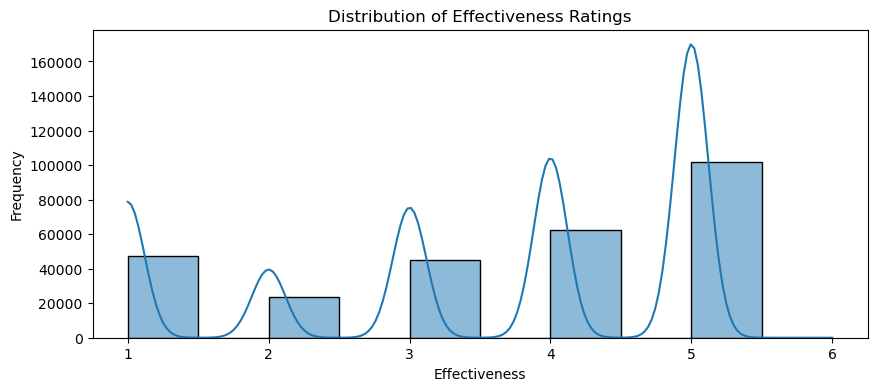

Mean Effectiveness: 3.53
Median Effectiveness: 4.00
Standard Deviation Effectiveness: 1.47


In [59]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='Effectiveness', bins=10, kde=True)
plt.title('Distribution of Effectiveness Ratings')
plt.xlabel('Effectiveness')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
effectiveness_mean = data['Effectiveness'].mean()
effectiveness_median = data['Effectiveness'].median()
effectiveness_std = data['Effectiveness'].std()
print(f"Mean Effectiveness: {effectiveness_mean:.2f}")
print(f"Median Effectiveness: {effectiveness_median:.2f}")
print(f"Standard Deviation Effectiveness: {effectiveness_std:.2f}")

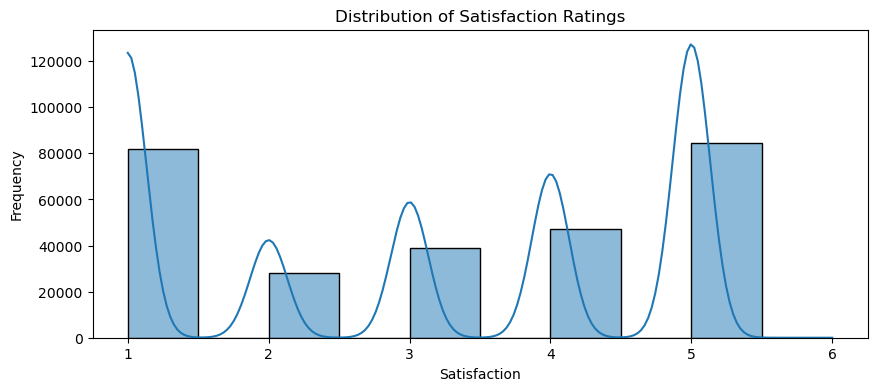

Mean Satisfaction: 3.09
Median Satisfaction: 3.00
Standard Deviation Satisfaction: 1.62


In [60]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='Satisfaction', bins=10, kde=True)
plt.title('Distribution of Satisfaction Ratings')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
satisfaction_mean = data['Satisfaction'].mean()
satisfaction_median = data['Satisfaction'].median()
satisfaction_std = data['Satisfaction'].std()
print(f"Mean Satisfaction: {satisfaction_mean:.2f}")
print(f"Median Satisfaction: {satisfaction_median:.2f}")
print(f"Standard Deviation Satisfaction: {satisfaction_std:.2f}")

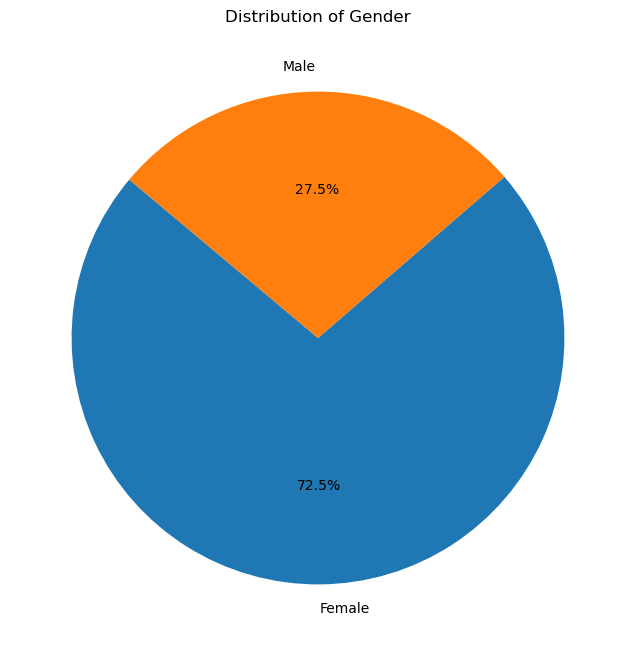

        Counts  Percentages (%)
Female  202980        72.459991
Male     77147        27.540009


In [61]:
sex_counts = data['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.show()

# Summary statistics
sex_summary = pd.DataFrame({'Counts': sex_counts, 'Percentages (%)': (sex_counts / sex_counts.sum()) * 100})
print(sex_summary)

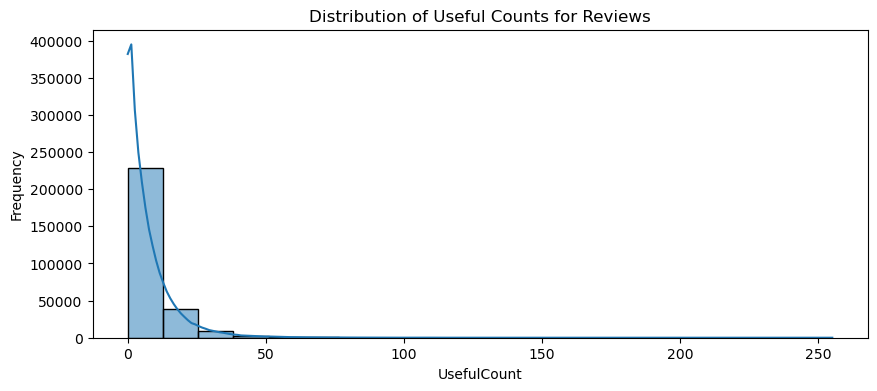

Mean UsefulCount: 7.37
Median UsefulCount: 4.00
Standard Deviation UsefulCount: 9.45


In [62]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='UsefulCount', bins=20, kde=True)
plt.title('Distribution of Useful Counts for Reviews')
plt.xlabel('UsefulCount')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
usefulcount_mean = data['UsefulCount'].mean()
usefulcount_median = data['UsefulCount'].median()
usefulcount_std = data['UsefulCount'].std()
print(f"Mean UsefulCount: {usefulcount_mean:.2f}")
print(f"Median UsefulCount: {usefulcount_median:.2f}")
print(f"Standard Deviation UsefulCount: {usefulcount_std:.2f}")

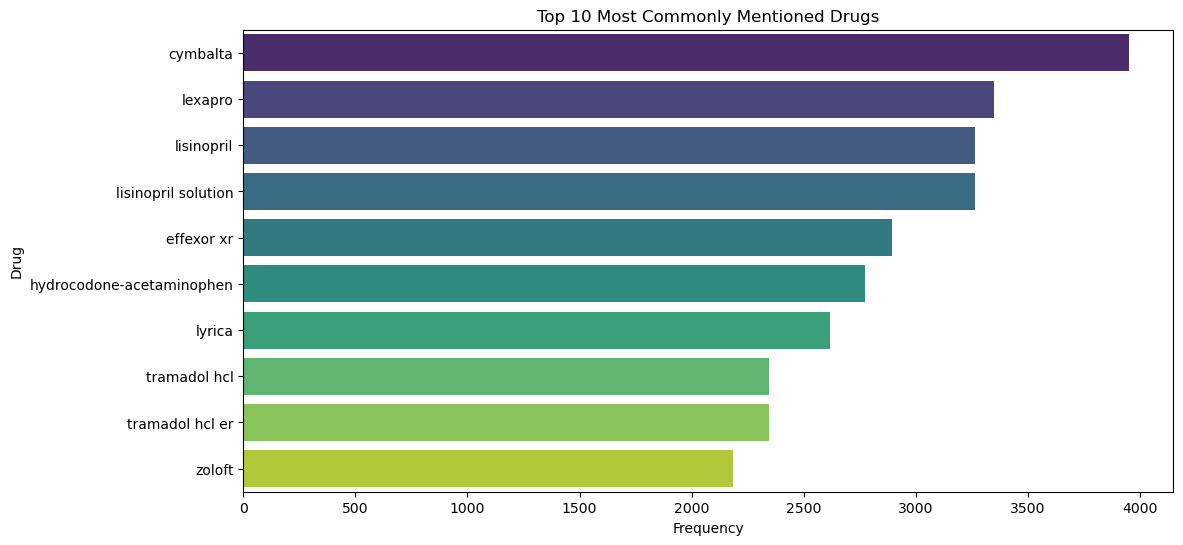

In [63]:
# Assuming you want to visualize the distribution of the top N drugs (change N as needed)
top_n_drugs = 10

# Get the top 10 most frequently mentioned drugs in the dataset
top_drugs = data['Drug'].value_counts().head(top_n_drugs)

# Create a bar chart to visualize the drug distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='viridis')
plt.title(f'Top {top_n_drugs} Most Commonly Mentioned Drugs')
plt.xlabel('Frequency')
plt.ylabel('Drug')
plt.show()

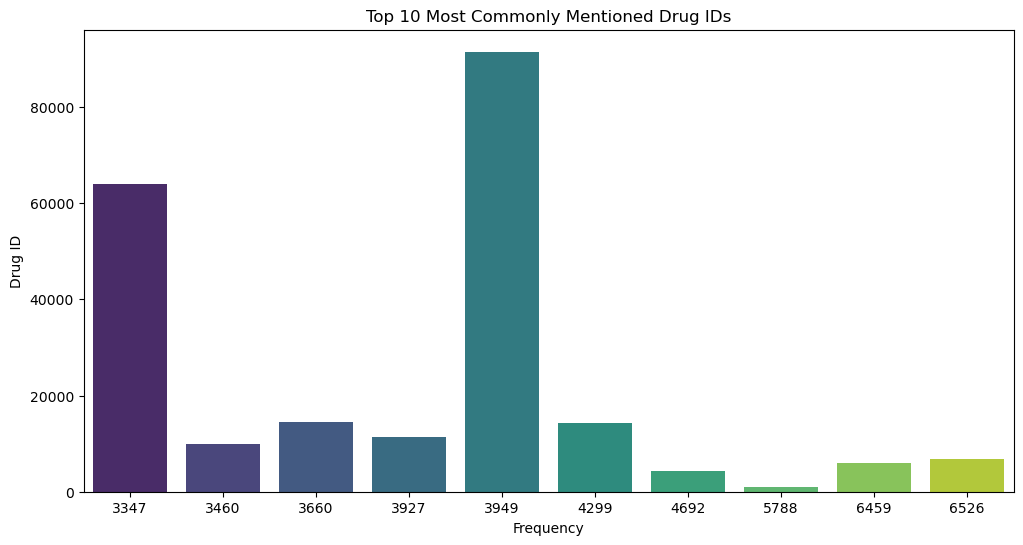

In [64]:
# Assuming you want to visualize the distribution of the top N Drug IDs (change N as needed)
top_n_drug_ids = 10

# Get the top 10 most frequently mentioned Drug IDs in the dataset
top_drug_ids = data['DrugId'].value_counts().head(top_n_drug_ids)

# Create a bar chart to visualize the Drug ID distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=top_drug_ids.values, y=top_drug_ids.index, palette='viridis')
plt.title(f'Top {top_n_drug_ids} Most Commonly Mentioned Drug IDs')
plt.xlabel('Frequency')
plt.ylabel('Drug ID')
plt.show()